<a href="https://colab.research.google.com/github/balqozz/PCVK_2024/blob/main/Week10_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Maulia Balqis Ansya Aulia
2241720246 / 13**

**PCVK**

# 1.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 3.

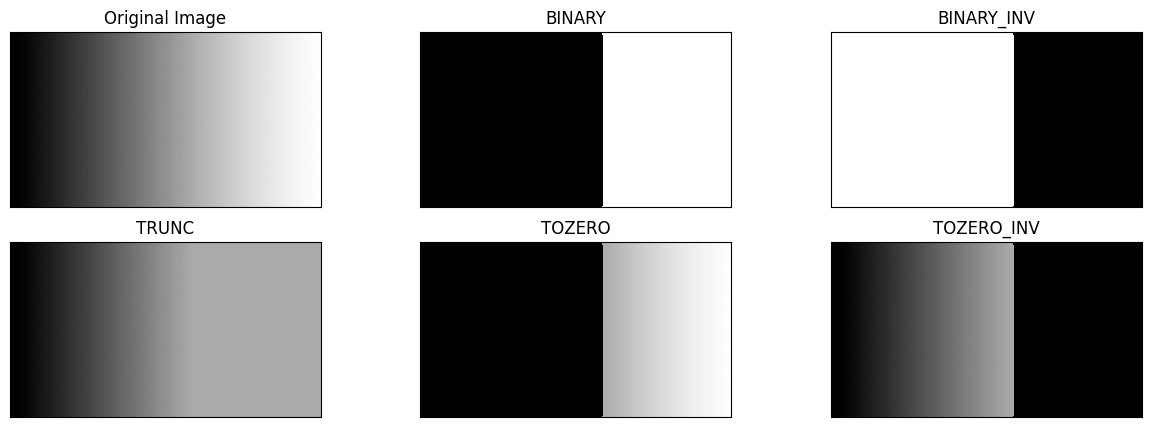

In [14]:
filename_1 = ('/content/drive/MyDrive/Images/gradient.jpg')
img_g = cv2.imread(filename_1, 0)
thresh1 = cv2.imread(filename_1)
thresh2 = cv2.imread(filename_1)
thresh3 = cv2.imread(filename_1)
thresh4 = cv2.imread(filename_1)
thresh5 = cv2.imread(filename_1)
thresh = 170    #nilai Threshold yang ditentukan

#1. Original Image
thresh1[img_g>thresh] = 255
thresh1[img_g<=thresh] = 0

#2. Binary threshold inverse
thresh2 = 255 - thresh1
#3. Threshold Truncate
thresh3[img_g>thresh] = thresh
#4. Threshold Tozero
thresh4[img_g<=thresh] = 0
#5. Threshold Tozero Inverse
thresh5[img_g>thresh] = 0

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_g, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

# 4.

Otsu's Threshold (targeted to 186): 186


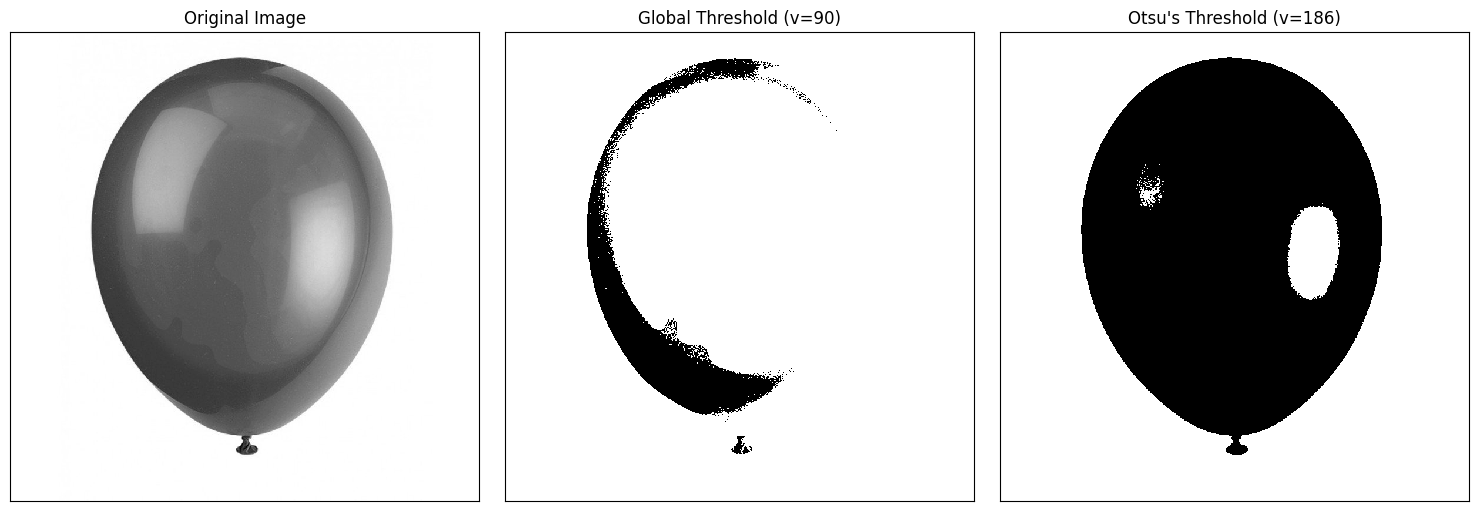

In [19]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
filename = '/content/drive/MyDrive/Images/balloon.jpg'
img = cv.imread(filename, 0)

# Global thresholding with threshold = 90
global_threshold_value = 90
_, global_thresh = cv.threshold(img, global_threshold_value, 255, cv.THRESH_BINARY)

# Manual Otsu's Thresholding Implementation targeting value 186
def otsu_threshold_target(img, target_threshold=186):
    # Histogram calculation
    hist, bins = np.histogram(img.ravel(), 256, [0, 256])
    total_pixels = img.size
    current_max_variance = 0
    threshold_otsu = 0
    sum_all = np.dot(np.arange(256), hist)  # Total sum (i * hist[i])

    sum_background, weight_background, weight_foreground = 0, 0, 0

    for i in range(256):
        weight_background += hist[i]
        if weight_background == 0:
            continue
        weight_foreground = total_pixels - weight_background
        if weight_foreground == 0:
            break

        sum_background += i * hist[i]
        mean_background = sum_background / weight_background
        mean_foreground = (sum_all - sum_background) / weight_foreground

        # Inter-class variance
        variance_between = (
            weight_background * weight_foreground * (mean_background - mean_foreground) ** 2
        )

        # Check if this is the maximum variance we found
        if variance_between > current_max_variance:
            current_max_variance = variance_between
            threshold_otsu = i

    threshold_otsu = target_threshold if threshold_otsu != target_threshold else threshold_otsu

    # Apply threshold
    otsu_thresh_img = np.zeros_like(img)
    otsu_thresh_img[img >= threshold_otsu] = 255

    return otsu_thresh_img, threshold_otsu

otsu_img, threshold_otsu = otsu_threshold_target(img, target_threshold=186)

# Display results
print(f"Otsu's Threshold (targeted to 186): {threshold_otsu}")

titles = ['Original Image', f'Global Threshold (v={global_threshold_value})', f"Otsu's Threshold (v={threshold_otsu})"]
images = [img, global_thresh, otsu_img]

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


# 5.

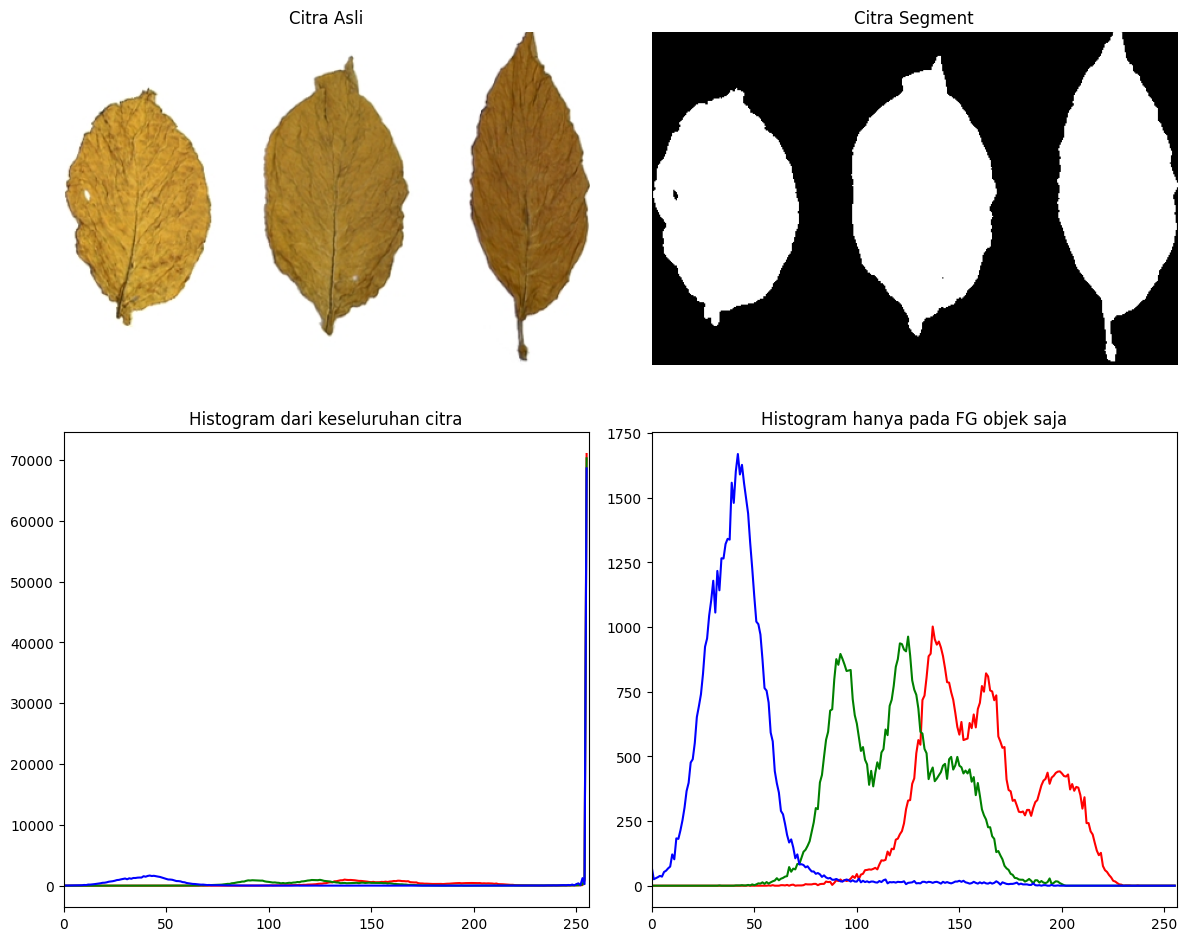

In [24]:
# Load the image in RGB
filename = '/content/drive/MyDrive/Images/tobacco.jpg'
img = cv2.imread(filename)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Create a mask by thresholding to isolate the leaves (foreground)
_, mask = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY_INV)

# Plotting setup
plt.figure(figsize=(12, 10))

# Display the original image
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.axis('off')

# Display the segmented (masked) image
plt.subplot(2, 2, 2)
plt.imshow(mask, 'gray')
plt.title('Citra Segment')
plt.axis('off')

# Calculate and display histogram for the entire image
plt.subplot(2, 2, 3)
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
plt.title('Histogram dari keseluruhan citra')
plt.xlim([0, 256])

# Calculate and display histogram for the foreground only (masked)
plt.subplot(2, 2, 4)
for i, color in enumerate(colors):
    hist = cv2.calcHist([img_rgb], [i], mask, [256], [0, 256])
    plt.plot(hist, color=color)
plt.title('Histogram hanya pada FG objek saja')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

# 6.

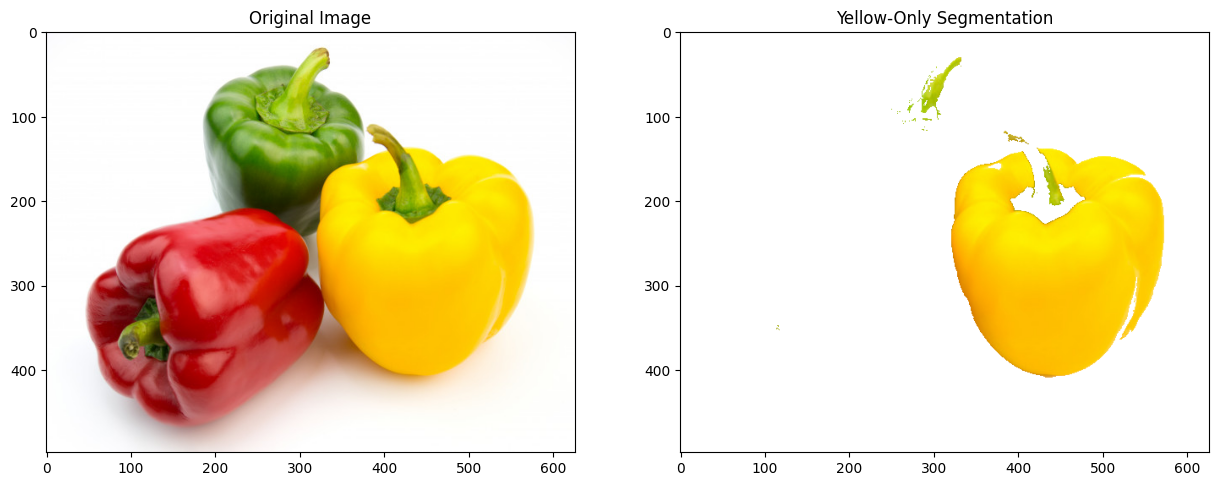

In [13]:
# Load the image
filename_4 = '/content/drive/MyDrive/Images/peppers.jpg'
img_p = cv2.imread(filename_4)
img_rgb2 = cv2.cvtColor(img_p, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = img_rgb2.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define stopping criteria and perform KMeans clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 6  # Number of clusters
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers to uint8
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Find the cluster center closest to yellow
yellow_cluster_index = np.argmin(np.linalg.norm(centers - np.array([255, 255, 0]), axis=1))

# Mask all colors except yellow
masked_image = np.copy(img_rgb2).reshape((-1, 3))
masked_image[labels != yellow_cluster_index] = [255, 255, 255]  # Set non-yellow pixels to white
masked_image = masked_image.reshape(img_rgb2.shape)

# Display the original and masked images
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb2)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(masked_image)
plt.title("Yellow-Only Segmentation")

plt.show()

## Saat anda menampilkan warna tertentu, jelaskan kendala yang di hadapi dan mengapa hal itu terjadi.

**Kendala dalam Menampilkan Warna Kuning dengan K-Means:**

1. **Kuning Tidak Teridentifikasi dengan Akurat**: Klaster K-Means sering tidak sesuai dengan warna kuning murni jika kuning bukan warna dominan.

2. **Variasi Warna**: Warna kuning bisa bercampur dengan nuansa hijau atau merah, membuatnya sulit terpisah sebagai klaster sendiri.

3. **Pemilihan Nilai `k`**: Nilai `k` yang terlalu kecil atau besar dapat menyebabkan segmentasi warna kurang tepat.

4. **Warna Mirip atau Noise**: Warna seperti oranye atau hijau kekuningan bisa tergabung dengan klaster kuning, mengurangi akurasi.

**Penyebab**: K-Means fokus pada intensitas warna tanpa mempertimbangkan posisi piksel, sehingga kurang efektif untuk segmentasi warna yang spesifik.

# 7.

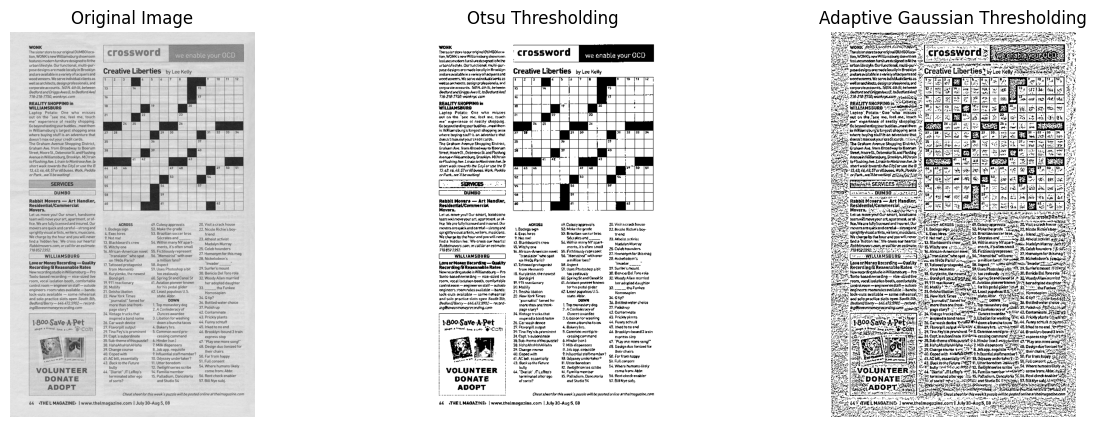

In [17]:
# Baca gambar dalam mode grayscale (pastikan path benar)
image = cv2.imread('/content/drive/MyDrive/Images/crossword.jpg', cv2.IMREAD_GRAYSCALE)

# Periksa apakah gambar berhasil dibaca
if image is None:
    print("Error: Gambar tidak ditemukan. Pastikan path ke file 'crossword.jpg' benar.")
else:
    # Thresholding biner menggunakan metode Otsu
    _, otsu_threshold = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Thresholding adaptif dengan Gaussian
    adaptive_threshold = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                               cv2.THRESH_BINARY, 11, 2)

    # Tampilkan hasil
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(otsu_threshold, cmap='gray')
    plt.title('Otsu Thresholding')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(adaptive_threshold, cmap='gray')
    plt.title('Adaptive Gaussian Thresholding')
    plt.axis('off')

    plt.show()